                    第三章   导数与微分

                        3.1 导数的概念

sympy中函数diff()用来求导。diff()函数有两种使用方法。

1、f(x).diff(x)
2、diff(f(x),x)。
都表示求函数f(x)关于x的一阶导数。

求高阶导数，可适当增加参数。

1、diff(f(x),x,x,x)
2、diff(f(x),x,3)
都是求三阶导数

【例3.1】求函数f(x)=C(C为常数)的导数

In [18]:
import sympy as sy

x,C = sy.symbols('x C')
#第一种求导的方式：f(x).diff(x)
print(C.diff(x))

0


【例3.2】求幂函数f(x) = x^u(u属于R）的导数。

In [20]:
import sympy as sy

x,u = sy.symbols('x u')
f = x**u
print("幂函数f(x)=x^u的导数为：",f.diff(x))

幂函数f(x)=x^u的导数为： u*x**u/x


【例3.3】求函数f(x) = sin(x)的导数。

In [22]:
import sympy as sy

x = sy.symbols('x')
f = sy.sin(x)
print(f.diff(x))

cos(x)


【例3.4】求函数f(x) = a^x (a>0,a不等于1)的导数。

In [25]:
import sympy as sy

a = sy.symbols('a',positive=True)
x= sy.symbols('x')
f = (a**x)
print(f.diff(x))

a**x*log(a)


【例3.5】求函数f(x) = log_a(x)的导数。其中a>0,且不等于1。


In [26]:
import sympy as sy

x,a = sy.symbols('x a')
f = sy.log(x,a)
print(f.diff(x))

1/(x*log(a))


【例3.6】求函数f(x) = ln(x)的导数。

In [11]:
import sympy as sy

x = sy.symbols('x')
f = sy.ln(x)
print(f.diff(x))

1/x


若要求导函数在某一点的函数值，可以使用subs()函数。例如求sin(x)的导数在x=0处的函数值。

In [28]:
import sympy as sy

x = sy.symbols('x')
f = sy.sin(x)
print(f.diff(x).subs(x,0))
print(sy.diff(f,x).subs(x,0))

1
1


                    3.2 函数的求导法则

【例3.7】已知y = 2*x^3-5*x^2+3*x-7,求y的导数。

In [30]:
import sympy as sy

x = sy.symbols('x')
f = (2*x**3-5*x**2+3*x-7)
print(f.diff(x))

6*x**2 - 10*x + 3


【例3.8】【例3.9】【例3.10】【例3.11】【例3.12】【例3.13】【例3.14】略

【3.15】已知y = e**(x**3),求y的导数。

In [32]:
import sympy as sy

x = sy.symbols('x')
u = x**3
y = sy.E**u
print(y.diff(x))

3*x**2*exp(x**3)


符合函数求导，u和y的定义顺序不能颠倒。

【例3.16】已知y = sin(2*x/(1+x**2),求y的导数。

In [37]:
import sympy as sy

x = sy.symbols('x')
y = sy.sin((2*x)/(1+x**2))
print(sy.simplify(y.diff(x)))

-2*(x**2 - 1)*cos(2*x/(x**2 + 1))/(x**2 + 1)**2


函数simplify()的作用是化简结果。

【例3.17】已知y = sin(nx)sin(x)**n(n为常数），求y的导数。

In [39]:
import sympy as sy
x = sy.symbols('x')
n = sy.symbols('n',constant = True)
y = sy.sin(n*x)*sy.sin(x)**n
print(sy.simplify(y.diff(x)))

n*sin(x)**(n - 1)*sin(n*x + x)


                    3.3 高阶导数

【例3.15】已知y = ax+b，求y的二阶导数。

In [40]:
import sympy as sy

x = sy.symbols('x')
a,b = sy.symbols('a b')
y = a*x+b
print(y.diff(x,2))

0


【例3.19】已知s = sin(wt),求s的二阶导数。

In [41]:
import sympy as sy

w,t = sy.symbols('w t')
y = sy.sin(w*t)
print(y.diff(t,2))

-w**2*sin(t*w)


【例3.20】证明函数y=(2x-x^2)**0.5满足y^3y"+1=0。

In [50]:
import sympy as sy

# 定义符号变量
x = sy.symbols('x')

# 定义函数
y = sy.sqrt(2*x - x**2)

# 计算二阶导数
y_double_prime = sy.diff(y,x,2)

# 验证微分方程
equation = y**3 * y_double_prime + 1

# 打印结果
print("y 的二阶导数为:")
print(y_double_prime)
print("验证微分方程 y^3 y'' + 1 = 0 是否成立:")
print(sy.simplify(equation) == 0)

y 的二阶导数为:
-(1 + (x - 1)**2/(x*(2 - x)))/sqrt(x*(2 - x))
验证微分方程 y^3 y'' + 1 = 0 是否成立:
True


这里二阶导数化简不充分，但不影响计算。

【例3.21】求指数函数y = e^x的n阶导数。

In [52]:
import sympy as sy

x = sy.symbols('x')
n = sy.symbols('n',integer=True,positive=True)
y = sy.E**x
print(sy.simplify(y.diff(x,n)))

0


这段代码输出的结果与预期的结果不一致，e^x的n阶导数还是e^x。
错误的原因是diff()函数被认为先对符号x求导，然后对符号n求导。
解决这个问题有两种处理方式，
一是输入任意n，求导；

In [55]:
import sympy as sy

x = sy.symbols('x')
n = input("请输入具体的n阶导数")
y = sy.E**x
print(sy.simplify(y.diff(x,n)))


exp(x)


二是sympy.Derivative() 是 SymPy 库中的一个类，用于表示符号化的导数（即未计算的导数）。它不会立即计算导数的值，而是返回一个符号化的导数表达式。这在需要表示导数但不需要立即计算的情况下非常有用

In [54]:
import sympy as sy

# 定义符号变量
x = sy.symbols('x')
n = sy.symbols('n', integer=True, positive=True)

# 定义函数
y = sy.E**x

# 符号化表示 n 阶导数
nth_derivative = sy.Derivative(y, (x, n))

# 打印结果
print(f"y 的 {n} 阶导数为:")
print(nth_derivative)

y 的 n 阶导数为:
Derivative(exp(x), (x, n))


【例3.22】已知y = x^2*e^(2x),求y的20阶导数。

In [1]:
import sympy as sy

x = sy.symbols('x')
y = x**2*sy.E**(2*x)
print(sy.simplify(y.diff(x,20)))

1048576*(x**2 + 20*x + 95)*exp(2*x)


                    3.4 隐函数及由参数方程所确定的函数的导数相关变化率

先看隐函数的作图问题：plot_implicit()可用来绘制隐函数图形。
plot_implicit(expr,x_var=None,y_var=None)中
1、expr表示要绘制的方程式或不等式；
2、x_var表示要绘制在x轴上的符号或符号连同其变化范围所构成的元组，例如(x,xmin,xmax);
3、y_var同x_var

绘制函数$x^2 - x y + y^2 - 2 = 0$的图像

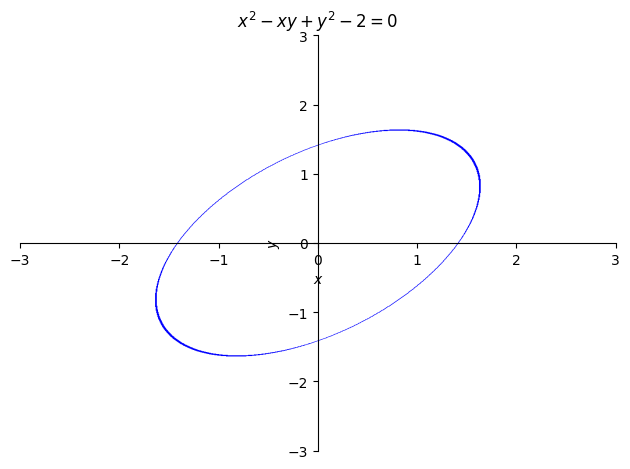

In [18]:
import sympy as sy

# 定义符号变量
x, y = sy.symbols('x y')

# 定义方程
equation = x**2 - x*y + y**2 - 2

# 使用 plot_implicit() 绘制图像
sy.plot_implicit(equation, (x, -3, 3), (y, -3, 3), title=r"$x^2 - x y + y^2 - 2 = 0$")

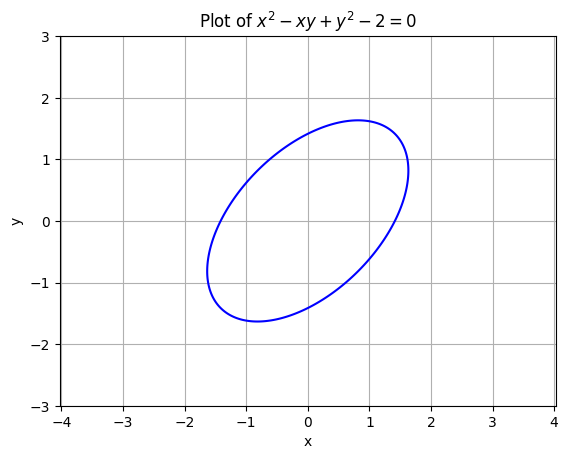

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 生成x和y的坐标点
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

# 计算方程左边的值
Z = X**2 - X * Y + Y**2 - 2

# 绘制等高线Z=0
plt.contour(X, Y, Z, levels=[0], colors='blue')

# 设置图表标题和坐标轴标签
plt.title('Plot of $x^2 - xy + y^2 - 2 = 0$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')  # 保证坐标轴比例一致
plt.show()

【例3.23】求由方程e^y+x*y-e=0所确定的隐函数的导数dy/dx。

In [12]:
import sympy as sy

x = sy.symbols('x',real=True)
y = sy.symbols('y',real=True)
f = sy.E**y+x*y-sy.E
idiff = sy.idiff(f,y,x)
print(idiff)

-y/(x + exp(y))


隐函数求导的函数是idiff(eq,y,x,n=1)
1、eq表示要求导的隐函数方程；
2、y表示因变量或因变量列表；
3、x表示要求导的变量；
4、n表示求导的阶数，默认为1。

        隐函数手工求导的步骤（对x求导）：
1、每一项对x求导，e^y对x求导等于e^y*dy/dx
2、xy对x求导，dx/dx*y+x*dy/dx = y+x*dy/dx
3、e对x求导，0
4、e^y*dy/dx+y+x*dy/dx = 0
5、合并同类项；（e^y+x)*dy/dx=-y  -->dy/dx = -y/(e^y+x)

【例3.24】求方程y^5+2y-x-3*x^7=0所确定的隐函数的导数在x=0处的值dy/dx|x=0。

In [16]:
import sympy as sy

x = sy.symbols('x', real=True)
y = sy.symbols('y', real=True)
f = y**5 + 2*y - x - 3*x**7  # 定义隐函数方程

# 计算隐函数的导数 dy/dx
idiff = sy.idiff(f, y, x)
print("导数 dy/dx =", idiff)

# 求解当 x=0 时的 y 值
f_at_x0 = f.subs(x, 0)       # 将 x 替换为 0
y_x_0 = sy.solve(f_at_x0, y) # 解方程 y**5 + 2y = 0
print("当 x=0 时，y 的解为:", y_x_0)

# 计算 x=0, y=0 处的导数值（需手动代入）
if 0 in y_x_0:
    dy_dx_at_0 = idiff.subs({x: 0, y: 0})
    print("在 (0, 0) 处的导数值 dy/dx =", dy_dx_at_0)
else:
    print("没有实数解 y=0，无法计算导数。")

导数 dy/dx = (21*x**6 + 1)/(5*y**4 + 2)
当 x=0 时，y 的解为: [0]
在 (0, 0) 处的导数值 dy/dx = 1/2


【例3.26】求方程x-y+1/2*sin(y)=0所确定的隐函数的二阶导数。

In [7]:
import sympy as sy

x,y = sy.symbols('x y')
f = x-y+sy.sin(y)/2
idiff = sy.idiff(f, y, x,n=2)
print(sy.simplify(idiff))

4*sin(y)/(cos(y) - 2)**3


【例3.27】求y = x**sin(x)的导数。

In [10]:
import sympy as sy

x = sy.symbols('x',positive=True)
y = x**sy.sin(x)
print(y.diff(x))

x**sin(x)*(log(x)*cos(x) + sin(x)/x)


【例3.28】已知椭圆参数方程为x = a*cos(t),y = b*sin(t),求二阶导数。

In [15]:
import sympy as sy
t,a,b = sy.symbols('t a b')
x = a*sy.cos(t)
y = b*sy.sin(t)
diff_1_x = sy.diff(y,t)/sy.diff(x,t)
print(sy.simplify(diff_1_x))
diff_2_x= diff_1_x.diff(t)/x.diff(t)
print(sy.simplify(diff_2_x))

-b/(a*tan(t))
-b/(a**2*sin(t)**3)


dy/dx = (dy/dt)/(dx/dt) = b*cos(t)/-a*sin(t) = -b/a*tan(t)

二阶导数= (-b/a*cot(t)/dt)/(dx/dt)= (b/a*csc(t)**2)/(-a*sin(t))= -b/(a**2*sin(t)**3)

        参数方程的画图：

plot_parametric(expr_x,expr_y,range)

其中：expr_x、expr_y分别代表x和y的表达式，range是由参数及参数范围所构成的三元元组。

例：x = t - sin(t),y = 1 - cos(t),绘制该隐函数的图像。

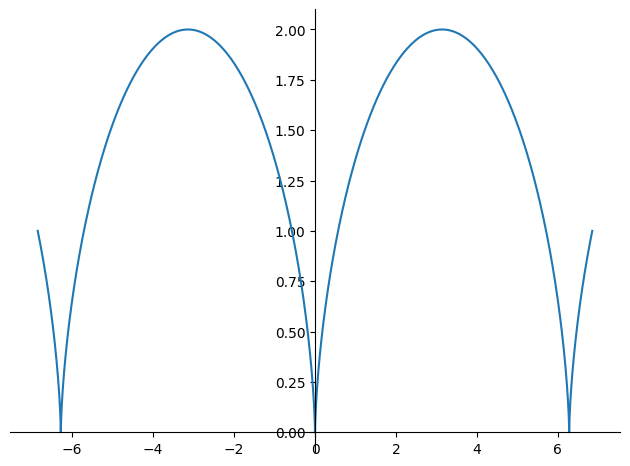

In [23]:
import sympy as sy
t = sy.symbols('t')
sy.plot_parametric(t-sy.sin(t),1-sy.cos(t),(t,-5*sy.pi/2,5*sy.pi/2))

用matlibplot.pyplot()进行作图。

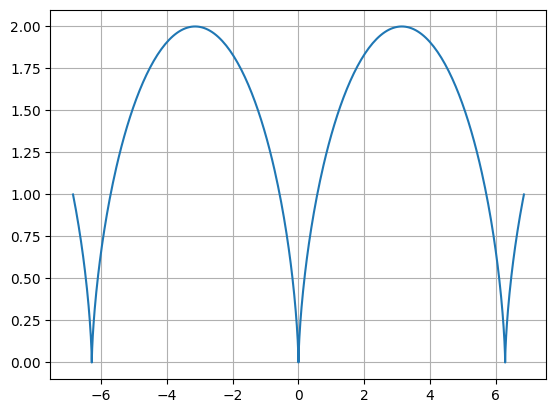

In [27]:
import numpy as np
import matplotlib.pyplot as plt
t =np.linspace(-5*np.pi/2,5*np.pi/2,500)
fig, ax = plt.subplots()
ax.plot(t-np.sin(t),1-np.cos(t))
plt.grid(True)
plt.show()